In [84]:
import pandas as pd
import networkx as nx
import numpy as np
import warnings
from scipy import sparse
from scipy.stats import spearmanr
from matplotlib import pyplot as plt

In [3]:
warnings.filterwarnings('ignore')

Following code cleans data and extracts relevant columns from the csv files

In [4]:
dataFrame_Review = pd.read_csv('csv dataset/yelp_academic_dataset_review.csv')


In [5]:
dataFrame_Tip = pd.read_csv('csv dataset/yelp_academic_dataset_tip.csv')

In [6]:
dataFrame_User = pd.read_csv('csv dataset/yelp_academic_dataset_user.csv')

In [7]:
dataFrame_Business = pd.read_csv('csv dataset/yelp_academic_dataset_business.csv')

In [8]:
dataFrame_Business = dataFrame_Business[['business_id','name','review_count','stars','attributes.Happy Hour','attributes.Good For.latenight',
                                         'attributes.Outdoor Seating','attributes.Ambience.classy',
                                         'attributes.Parking.lot','attributes.Ambience.touristy',
                                         'attributes.Good For.brunch','attributes.Waiter Service',
                                         'attributes.Accepts Credit Cards','attributes.Good For.lunch',
                                         'attributes.Parking.valet','attributes.Good For.dessert',
                                         'attributes.Wi-Fi','attributes.Good For.dinner','attributes.Has TV',
                                          'attributes.Good For Groups']]

dataFrame_Business = dataFrame_Business.fillna(0)
d = {'free':1,'no':0}
dataFrame_Business['attributes.Wi-Fi'] = dataFrame_Business['attributes.Wi-Fi'].replace(d)
df_tempBusiness = dataFrame_Business[['attributes.Happy Hour','attributes.Good For.latenight',
                                         'attributes.Outdoor Seating','attributes.Ambience.classy',
                                         'attributes.Parking.lot','attributes.Ambience.touristy',
                                         'attributes.Good For.brunch','attributes.Waiter Service',
                                         'attributes.Accepts Credit Cards','attributes.Good For.lunch',
                                         'attributes.Parking.valet','attributes.Good For.dessert',
                                         'attributes.Good For.dinner','attributes.Has TV',
                                          'attributes.Good For Groups','attributes.Wi-Fi']].astype(str)
dataFrame_Business = dataFrame_Business[['business_id','name','review_count','stars']]

d = {'True':1,'False':0}
df_tempBusiness = df_tempBusiness.replace(d)
df_tempBusiness = df_tempBusiness.convert_objects(convert_numeric=True)
df_tempBusiness['facility score'] = df_tempBusiness.sum(axis=1)
dataFrame_Business = pd.concat([dataFrame_Business,df_tempBusiness['facility score']],axis=1)
del df_tempBusiness
dataFrame_Business

,business_id,name,review_count,stars,facility score
0,5UmKMjUEUNdYWqANhGckJw,Mr Hoagie,7,3.5,2.0
1,UsFtqoBl7naz8AVUBZMjQQ,Clancy's Pub,5,3.0,3.0
2,cE27W9VPgO88Qxe4ol6y_g,Cool Springs Golf Center,5,2.5,0.0
3,mVHrayjG3uZ_RLHkLj-AMg,Emil's Lounge,26,4.5,5.0
4,mYSpR_SLPgUVymYOvTQd_Q,Grand View Golf Club,3,5.0,2.0
5,KayYbHCt-RkbGcPdGOThNg,Alexion's Bar & Grill,23,4.0,9.0
6,b12U9TFESStdy7CsTtcOeg,Flynn's Tire & Auto Service,9,2.5,1.0
7,Sktj1eHQFuVa-M4bgnEh8g,Forsythe Miniature Golf & Snacks,4,4.0,0.0
8,3ZVKmuK2l7uXPE6lXY4Dbg,Quaker State Construction,3,2.5,0.0
9,QoDa50dc7g62xciFygXB9w,Greentree Animal Clinic,7,4.0,0.0


In [9]:
dataFrame_Checkin = pd.read_csv('csv dataset/yelp_academic_dataset_checkin.csv')

# Q1) Construct a review network and plot histograms 

Ans 1) We calculate the degree distribution of users and businesses and plot their histograms in linear and log scale as follows

In [10]:
user_idDegrees = dataFrame_Review.groupby(['user_id']).count()
user_idDegrees.reset_index(inplace=True)
user_idDegrees.rename(columns = {'review_id':'count'},inplace=True)
user_idDegrees = user_idDegrees[['user_id','count']]
user_idDegrees.sort('count',inplace=True)
user_idDegrees

,user_id,count
0,---teJGnwK07UO6_oJfbRw,1
263568,NY9RQMd3stboqcIpdNX_yw,1
506084,jAwLFiP9NK1yaNKzqdRBQA,1
506085,jAwqxGgKwH71o1mIBdqMdQ,1
263565,NY96GrjJkY2X5R2gRTr_BA,1
263564,NY93BLUc5dKgXvHddFeqGg,1
263563,NY8w-5xbifNFBxBD6Nf1Rg,1
263562,NY8GiLGU3hOaj_7Ru8hBfw,1
506087,jAxLfbN8YcyX4O70xGkd4A,1
506088,jAxSPONmgZceYGSKuSda8w,1


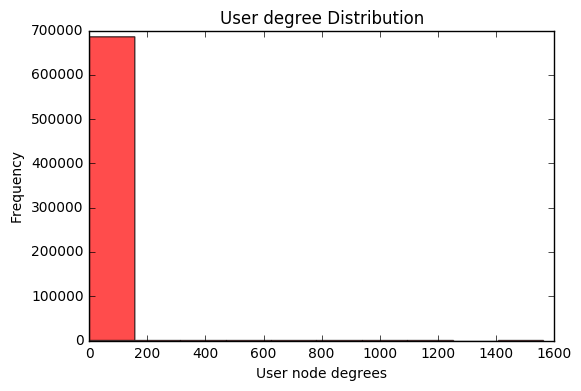

In [16]:
plt.xlabel("User node degrees",fontsize=10); 
plt.ylabel("Frequency", fontsize=10)
_=plt.title("User degree Distribution", fontsize=12)
X = user_idDegrees['count']
#plt.axvline(X.mean(), color='green', linestyle='dashed', linewidth=2)
plt.hist(X,color='r', alpha=0.7, normed=False)
plt.show()

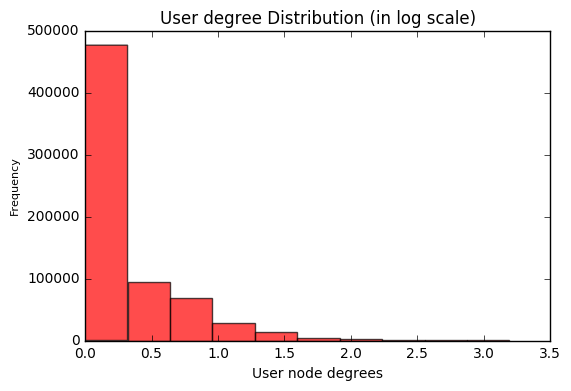

In [12]:
plt.xlabel("User node degrees",fontsize=10); 
plt.ylabel("Frequency", fontsize=8)
_=plt.title("User degree Distribution (in log scale)", fontsize=12)
X = np.log10(user_idDegrees['count'])
#plt.axvline(X.mean(), color='green', linestyle='dashed', linewidth=2)
plt.hist(X,color='r', alpha=0.7, normed=False)
plt.show()

In [13]:
business_idDegrees = dataFrame_Review.groupby(["business_id"]).count()
business_idDegrees.reset_index(inplace=True)
business_idDegrees.rename(columns = {'review_id':'count'},inplace=True)
business_idDegrees = business_idDegrees[['business_id','count']]
business_idDegrees.sort('count',inplace=True)
business_idDegrees

,business_id,count
25111,Hc3qKbQPSbXrGwEUUkTsBQ,1
20504,EC8I62pXmzHJUU-Fr16K8w,1
51530,aNez8JPcA27pQEjPoHvBCw,1
11203,7I5jS8X-GYwaNRL5iNmv4w,1
11209,7IR9glhHqTuWxw9n5zed2g,1
3932,1pDsT9S6YgD_gZBiJL88uw,1
63697,jdfiV3GfMb53cfjBWoAFQA,1
73768,r9RGi3QjsxQ9gHThiS9_3g,1
20492,EBjXf6Wizd79wW7DdChFVA,1
71759,pg7JrrDRCvI5vLVn0zQ0gw,1


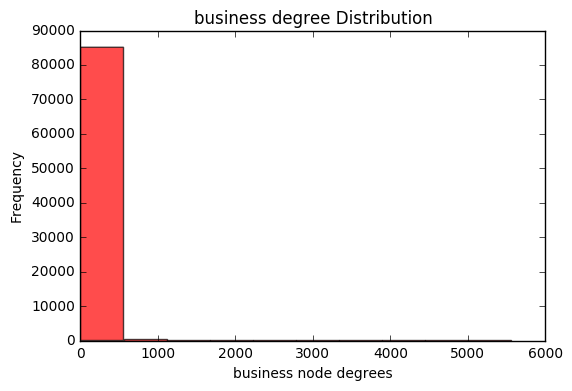

In [10]:
plt.xlabel("business node degrees",fontsize=10); 
plt.ylabel("Frequency", fontsize=10)
_=plt.title("business degree Distribution", fontsize=12)
X = business_idDegrees['count']
#plt.axvline(X.mean(), color='green', linestyle='dashed', linewidth=2)
plt.hist(X,color='r', alpha=0.7, normed=False)
plt.show()

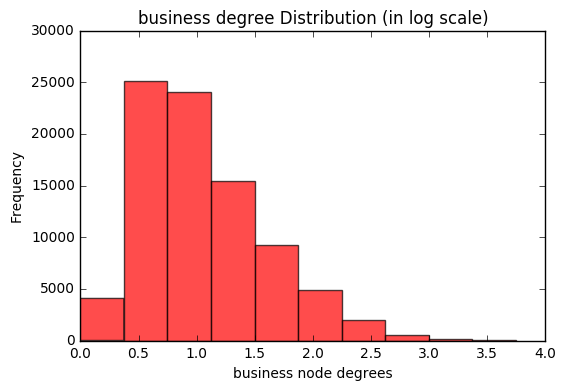

In [11]:
plt.xlabel("business node degrees",fontsize=10); 
plt.ylabel("Frequency", fontsize=10)
_=plt.title("business degree Distribution (in log scale)", fontsize=12)
X = np.log10(business_idDegrees['count'])
#plt.axvline(X.mean(), color='green', linestyle='dashed', linewidth=2)
plt.hist(X,color='r', alpha=0.7, normed=False)
plt.show()

Degree distributions in log scale are much better because the scale on x axis gets distributed by taking log giving a more clear picture

# Q2) Run pagerank Algorithm and identify businesses with highest pagerank scores 

Ans 2) First, we compute the CSR matrix for all user and business nodes. We convert our undirected graph to a directed graph by assigning extra edges from a business node to user node wherever there is an edge from user node to business node. 

In [15]:
NODES = 686556 + 85539
NODES

772095

In [16]:
EDGES = 5370132

In [17]:
df_businessIndex = pd.DataFrame()
df_businessIndex['business_id'] = dataFrame_Review['business_id'].unique()
df_businessIndex['business_index'] = df_businessIndex.index + 686556
df_businessIndex


,business_id,business_index
0,5UmKMjUEUNdYWqANhGckJw,686556
1,UsFtqoBl7naz8AVUBZMjQQ,686557
2,cE27W9VPgO88Qxe4ol6y_g,686558
3,mVHrayjG3uZ_RLHkLj-AMg,686559
4,mYSpR_SLPgUVymYOvTQd_Q,686560
5,KayYbHCt-RkbGcPdGOThNg,686561
6,b12U9TFESStdy7CsTtcOeg,686562
7,Sktj1eHQFuVa-M4bgnEh8g,686563
8,3ZVKmuK2l7uXPE6lXY4Dbg,686564
9,QoDa50dc7g62xciFygXB9w,686565


In [18]:
df_userIndex = pd.DataFrame()
df_userIndex['user_id'] = dataFrame_Review['user_id'].unique()
df_userIndex['user_index'] = df_userIndex.index
df_userIndex

,user_id,user_index
0,PUFPaY9KxDAcGqfsorJp3Q,0
1,Iu6AxdBYGR4A0wspR9BYHA,1
2,auESFwWvW42h6alXgFxAXQ,2
3,qiczib2fO_1VBG8IoCGvVg,3
4,qEE5EvV-f-s7yHC0Z4ydJQ,4
5,jBoH6qKGO7wdYyg_YjBcQA,5
6,bWrodc7hN_T4q2r-rolrOA,6
7,uK8tzraOp4M5u3uYrqIBXg,7
8,I_47G-R2_egp7ME5u_ltew,8
9,PP_xoMSYlGr2pb67BbqBdA,9


In [19]:
dataFrame_ReviewIndexWise = dataFrame_Review.merge(df_userIndex,on='user_id')
dataFrame_ReviewIndexWise = dataFrame_ReviewIndexWise.merge(df_businessIndex,on='business_id')

dataFrame_ReviewIndexWise1 = dataFrame_ReviewIndexWise[['user_index','business_index']]

dataFrame_ReviewIndexWise2 = dataFrame_ReviewIndexWise[['business_index','user_index']]
dataFrame_ReviewIndexWise2.rename(columns = {'business_index':'user_index','user_index':'business_index'},inplace = True)

dataFrame_ReviewEdges = pd.concat([dataFrame_ReviewIndexWise1,dataFrame_ReviewIndexWise2],
                                      axis=0,ignore_index=True)
dataFrame_ReviewEdges.rename(columns = {'user_index':'Origin','business_index':'destination'},inplace=True)

del dataFrame_ReviewIndexWise
del dataFrame_ReviewIndexWise1
del dataFrame_ReviewIndexWise2

csr_matrix = sparse.csr_matrix(([True]*EDGES,(dataFrame_ReviewEdges.Origin,dataFrame_ReviewEdges.destination)),shape=(NODES,NODES))
csr_matrix



<772095x772095 sparse matrix of type '<type 'numpy.bool_'>'
	with 5203354 stored elements in Compressed Sparse Row format>

Following code snippets are taken from Samuel M.H. 's technological blog a.k.a samucoder

Saving the csr matrix

In [20]:
def csr_save(filename,csr):
    np.savez(filename,
        nodes=csr.shape[0],
        edges=csr.data.size,
        indices=csr.indices,
        indptr =csr.indptr
    )

def csr_load(filename):
    loader = np.load(filename)
    edges = int(loader['edges'])
    nodes = int(loader['nodes'])
    return sparse.csr_matrix(
        (np.bool_(np.ones(edges)), loader['indices'], loader['indptr']),
        shape = (nodes,nodes)
    )

In [21]:
filename = 'csr_matrix.npz'
csr_save(filename,csr_matrix)
%time csr_matrix = csr_load(filename)

CPU times: user 25.3 ms, sys: 18 ms, total: 43.3 ms
Wall time: 43.7 ms


In [22]:
def compute_PageRank(G, beta=0.85, epsilon=10**-4):
    '''
    Efficient computation of the PageRank values using a sparse adjacency 
    matrix and the iterative power method.
    
    Parameters
    ----------
    G : boolean adjacency matrix. np.bool8
        If the element j,i is True, means that there is a link from i to j.
    beta: 1-teleportation probability.
    epsilon: stop condition. Minimum allowed amount of change in the PageRanks
        between iterations.

    Returns
    -------
    output : tuple
        PageRank array normalized top one.
        Number of iterations.

    '''    
    #Test adjacency matrix is OK
    n,_ = G.shape
    assert(G.shape==(n,n))
    #Constants Speed-UP
    deg_out_beta = G.sum(axis=0).T/beta #vector
    #Initialize
    ranks = np.ones((n,1))/n #vector
    time = 0
    flag = True
    while flag:        
        time +=1
        with np.errstate(divide='ignore'): # Ignore division by 0 on ranks/deg_out_beta
            new_ranks = G.dot((ranks/deg_out_beta)) #vector
        #Leaked PageRank
        new_ranks += (1-new_ranks.sum())/n
        #Stop condition
        if np.linalg.norm(ranks-new_ranks,ord=1)<=epsilon:
            flag = False        
        ranks = new_ranks
    return(ranks, time)



In [81]:
print '==> Computing PageRank'
%time pr,iters = compute_PageRank(csr_matrix)
print '\nIterations: {0}'.format(iters)
print 'Element with the highest PageRank: {0}'.format(np.argmax(pr)+1)

==> Computing PageRank
CPU times: user 1.89 s, sys: 649 ms, total: 2.54 s
Wall time: 2.54 s

Iterations: 60
Element with the highest PageRank: 750156


From the pr vector with pagerank values for all businesses , we calculate the top 100 businesses as follows

In [82]:
dataFrame_nodesIndex = pd.DataFrame()
dataFrame_nodesIndex['Node Index'] = np.arange(0,772095)
dataFrame_nodesIndex['Page Rank Value'] = pr

dataFrame_businessNodesIndex = dataFrame_nodesIndex[686556:]
dataFrame_businessNodesIndex.rename(columns = {'Node Index':'business_index'},inplace=True)

dataFrame_businessNodesIndex = dataFrame_businessNodesIndex.merge(df_businessIndex,on='business_index')


dataFrame_businessNodesIndex = dataFrame_businessNodesIndex.merge(dataFrame_Business,on='business_id',how='inner')
dataFrame_businessNodesIndex.sort('Page Rank Value',ascending=False,inplace=True)

dataFrame_businessNodesIndex[:100]

,business_index,Page Rank Value,business_id,name,review_count,stars,facility score
62784,750155,0.001180,iUPJmJvHy9fVfRxsuwwdLQ,Gangnam Asian BBQ Dining,3767,4.5,7.0
19919,706738,0.001017,4bEjOyTaDG24SY5TxsaUNQ,Mon Ami Gabi,6200,4.0,5.0
61760,749117,0.000842,aGbjLWzcrnEx2ZmMCFm3EA,Gordon Ramsay BurGR,4620,4.0,5.0
59454,746787,0.000836,sIyHTizqAiGu12XMLX3N3g,Bacchanal Buffet,5216,4.0,5.0
49624,736833,0.000766,zt1TpTuJ6y9n551sw9TaEg,Wicked Spoon,4967,3.5,4.0
27451,714362,0.000697,2e2e7WgqU1BnpxmQL5jbfw,Earl of Sandwich,4687,4.5,5.0
40621,727706,0.000621,QbmcCE_cLq4WO8ZMKImaLw,Hash House A Go Go,3577,4.0,6.0
35953,722976,0.000590,Xhg93cMdemu5pAMkDoEdtQ,Serendipity 3,3781,3.0,7.0
35596,722618,0.000533,JpHE7yhMS5ehA9e8WG_ETg,ARIA Hotel & Casino,3181,3.5,2.0
20081,706900,0.000524,YNQgak-ZLtYJQxlDwN-qIg,The Buffet,3546,3.5,6.0


In [83]:
dataFrame_businessNodesIndex = dataFrame_businessNodesIndex[['Page Rank Value','business_id']]
dataFrame_businessNodesIndex = dataFrame_businessNodesIndex[:100]
dataFrame_businessNodesIndex.set_index(np.arange(1,101),inplace=True)
dataFrame_businessNodesIndex
#dataFrame_businessNodesIndex.to_json('Q3.json')

,Page Rank Value,business_id
1,0.001180,iUPJmJvHy9fVfRxsuwwdLQ
2,0.001017,4bEjOyTaDG24SY5TxsaUNQ
3,0.000842,aGbjLWzcrnEx2ZmMCFm3EA
4,0.000836,sIyHTizqAiGu12XMLX3N3g
5,0.000766,zt1TpTuJ6y9n551sw9TaEg
6,0.000697,2e2e7WgqU1BnpxmQL5jbfw
7,0.000621,QbmcCE_cLq4WO8ZMKImaLw
8,0.000590,Xhg93cMdemu5pAMkDoEdtQ
9,0.000533,JpHE7yhMS5ehA9e8WG_ETg
10,0.000524,YNQgak-ZLtYJQxlDwN-qIg


# Q3) Other ways to rank restaurants

Ans 3) We identify the following 5 features to be used in ranking the businesses :
 1.) business review count
 2.) business stars
 3.) Total number of weekly checkins
 4.) total tip count for each business
 5.) facility/attribute score - number of relevant facilities provided by each business.We identify some attributes that can influence the ranking of a business (such as parking lot, free wifi,tv,etc) and then count how many of them are provided by each business  

In [25]:
dataFrame_Checkin = dataFrame_Checkin.fillna(0)
dataFrame_CheckinTemp = pd.DataFrame.copy(dataFrame_Checkin)
dataFrame_Checkin = dataFrame_Checkin[['business_id']]
dataFrame_CheckinTemp.drop(['business_id','type'],axis=1,inplace=True)
dataFrame_CheckinTemp['Weekly checkins'] = dataFrame_CheckinTemp.sum(axis=1)
dataFrame_Checkin = pd.concat([dataFrame_Checkin,dataFrame_CheckinTemp['Weekly checkins']],axis=1)
del dataFrame_CheckinTemp
dataFrame_Checkin

,business_id,Weekly checkins
0,cE27W9VPgO88Qxe4ol6y_g,9.0
1,mVHrayjG3uZ_RLHkLj-AMg,28.0
2,mYSpR_SLPgUVymYOvTQd_Q,8.0
3,KayYbHCt-RkbGcPdGOThNg,65.0
4,b12U9TFESStdy7CsTtcOeg,7.0
5,QoDa50dc7g62xciFygXB9w,7.0
6,1_lU0-eSWJCRvNGk78Zh9Q,5.0
7,_qopVQ6_Mz6W7-Pmbi56GQ,4.0
8,wJr6kSA5dchdgOdwH6dZ2w,17.0
9,yXuao0pFz1AxB21vJjDf5w,26.0


Checkin table consists of some business ids with invalid values such as '#VALUE!' and '#NAME?'. So we need to remove such values from this table. Also Some of the business Ids present in tip table are not present in business table . So we ignore those ids for now.

In [26]:
dataFrame_Checkin = dataFrame_Checkin[dataFrame_Checkin.business_id!='#VALUE!']
dataFrame_Checkin = dataFrame_Checkin[dataFrame_Checkin.business_id!='#NAME?']
dataFrame_Checkin


,business_id,Weekly checkins
0,cE27W9VPgO88Qxe4ol6y_g,9.0
1,mVHrayjG3uZ_RLHkLj-AMg,28.0
2,mYSpR_SLPgUVymYOvTQd_Q,8.0
3,KayYbHCt-RkbGcPdGOThNg,65.0
4,b12U9TFESStdy7CsTtcOeg,7.0
5,QoDa50dc7g62xciFygXB9w,7.0
6,1_lU0-eSWJCRvNGk78Zh9Q,5.0
7,_qopVQ6_Mz6W7-Pmbi56GQ,4.0
8,wJr6kSA5dchdgOdwH6dZ2w,17.0
9,yXuao0pFz1AxB21vJjDf5w,26.0


In [27]:
dataFrame_Tip = dataFrame_Tip.groupby('business_id').count()
dataFrame_Tip = dataFrame_Tip.reset_index()
dataFrame_Tip = dataFrame_Tip[['business_id','user_id']]
dataFrame_Tip.rename(columns = {'user_id':'tip count'},inplace=True)
dataFrame_Tip

,business_id,tip count
0,--0ZoBTQWQra1FxD4rBWmg,2
1,--1emggGHgoG6ipd_RMb-g,7
2,--4Pe8BZ6gj57VFL5mUE8g,2
3,--5jkZ3-nUPZxUvtcbr8Uw,27
4,--BlvDO_RG2yElKu9XA1_g,23
5,--Dl2rW_xO8GuYBomlg9zw,1
6,--NCcmQqh_NZbjW1S5XsGQ,1
7,--UE_y6auTgq3FXlvUMkbw,40
8,--XBxRlD92RaV6TyUnP8Ow,2
9,--Y_2lDOtVDioX5bwF6GIw,11


In [28]:
dataFrame_RankBusiness = pd.merge(dataFrame_Business, dataFrame_Tip, on='business_id', how='left')
dataFrame_RankBusiness = pd.merge(dataFrame_RankBusiness,dataFrame_Checkin,on='business_id',how='left')
dataFrame_RankBusiness = dataFrame_RankBusiness.fillna(0)

In [29]:
dataFrame_RankBusiness

,business_id,name,review_count,stars,facility score,tip count,Weekly checkins
0,5UmKMjUEUNdYWqANhGckJw,Mr Hoagie,7,3.5,2.0,1.0,0.0
1,UsFtqoBl7naz8AVUBZMjQQ,Clancy's Pub,5,3.0,3.0,0.0,0.0
2,cE27W9VPgO88Qxe4ol6y_g,Cool Springs Golf Center,5,2.5,0.0,1.0,9.0
3,mVHrayjG3uZ_RLHkLj-AMg,Emil's Lounge,26,4.5,5.0,2.0,28.0
4,mYSpR_SLPgUVymYOvTQd_Q,Grand View Golf Club,3,5.0,2.0,0.0,8.0
5,KayYbHCt-RkbGcPdGOThNg,Alexion's Bar & Grill,23,4.0,9.0,4.0,65.0
6,b12U9TFESStdy7CsTtcOeg,Flynn's Tire & Auto Service,9,2.5,1.0,0.0,7.0
7,Sktj1eHQFuVa-M4bgnEh8g,Forsythe Miniature Golf & Snacks,4,4.0,0.0,0.0,0.0
8,3ZVKmuK2l7uXPE6lXY4Dbg,Quaker State Construction,3,2.5,0.0,0.0,0.0
9,QoDa50dc7g62xciFygXB9w,Greentree Animal Clinic,7,4.0,0.0,0.0,7.0


Calculating spearman correlation and p values between these 5 ranking features.

In [85]:
spearmanr(dataFrame_RankBusiness['Weekly checkins'],dataFrame_RankBusiness['tip count'])

SpearmanrResult(correlation=0.81982160218836087, pvalue=0.0)

In [87]:
spearmanr(dataFrame_RankBusiness['Weekly checkins'],dataFrame_RankBusiness['facility score'])

SpearmanrResult(correlation=0.52243621902609927, pvalue=0.0)

In [88]:
spearmanr(dataFrame_RankBusiness['Weekly checkins'],dataFrame_RankBusiness['stars'])

SpearmanrResult(correlation=-0.12758962398883469, pvalue=1.5142460292975144e-308)

In [89]:
spearmanr(dataFrame_RankBusiness['Weekly checkins'],dataFrame_RankBusiness['review_count'])

SpearmanrResult(correlation=0.70663104632226337, pvalue=0.0)

In [90]:
spearmanr(dataFrame_RankBusiness['tip count'],dataFrame_RankBusiness['facility score'])

SpearmanrResult(correlation=0.52249658570871871, pvalue=0.0)

In [91]:
spearmanr(dataFrame_RankBusiness['tip count'],dataFrame_RankBusiness['stars'])

SpearmanrResult(correlation=-0.10773872017663018, pvalue=4.1849864001603214e-220)

In [92]:
spearmanr(dataFrame_RankBusiness['tip count'],dataFrame_RankBusiness['review_count'])

SpearmanrResult(correlation=0.70449380941170203, pvalue=0.0)

In [93]:
spearmanr(dataFrame_RankBusiness['facility score'],dataFrame_RankBusiness['stars'])

SpearmanrResult(correlation=-0.1199875414194984, pvalue=7.2450262182598237e-273)

In [94]:
spearmanr(dataFrame_RankBusiness['facility score'],dataFrame_RankBusiness['review_count'])

SpearmanrResult(correlation=0.54876423345975411, pvalue=0.0)

In [95]:
spearmanr(dataFrame_RankBusiness['stars'],dataFrame_RankBusiness['review_count'])

SpearmanrResult(correlation=-0.029950459590249088, pvalue=1.6349830076226067e-18)

# Q4) Rerun pagerank with non uniform priors

Ans 4) For this question ,we first calculate a score of each business by aggregating their weighted ranking features from Q3.

In [31]:
dataFrame_RankBusiness['Net Score'] = (4*(dataFrame_RankBusiness['review_count'] + dataFrame_RankBusiness['facility score']
                                         + dataFrame_RankBusiness['tip count'] + dataFrame_RankBusiness['Weekly checkins'])
                                       + 3*dataFrame_RankBusiness['stars'])/19.0

In [32]:
dataFrame_RankBusiness

,business_id,name,review_count,stars,facility score,tip count,Weekly checkins,Net Score
0,5UmKMjUEUNdYWqANhGckJw,Mr Hoagie,7,3.5,2.0,1.0,0.0,2.657895
1,UsFtqoBl7naz8AVUBZMjQQ,Clancy's Pub,5,3.0,3.0,0.0,0.0,2.157895
2,cE27W9VPgO88Qxe4ol6y_g,Cool Springs Golf Center,5,2.5,0.0,1.0,9.0,3.552632
3,mVHrayjG3uZ_RLHkLj-AMg,Emil's Lounge,26,4.5,5.0,2.0,28.0,13.552632
4,mYSpR_SLPgUVymYOvTQd_Q,Grand View Golf Club,3,5.0,2.0,0.0,8.0,3.526316
5,KayYbHCt-RkbGcPdGOThNg,Alexion's Bar & Grill,23,4.0,9.0,4.0,65.0,21.894737
6,b12U9TFESStdy7CsTtcOeg,Flynn's Tire & Auto Service,9,2.5,1.0,0.0,7.0,3.973684
7,Sktj1eHQFuVa-M4bgnEh8g,Forsythe Miniature Golf & Snacks,4,4.0,0.0,0.0,0.0,1.473684
8,3ZVKmuK2l7uXPE6lXY4Dbg,Quaker State Construction,3,2.5,0.0,0.0,0.0,1.026316
9,QoDa50dc7g62xciFygXB9w,Greentree Animal Clinic,7,4.0,0.0,0.0,7.0,3.578947


We assign a small user score to each user in order to calculate the weighted priors pagerank on all nodes

In [97]:
df_userScores = pd.DataFrame()
df_userScores['user_index'] = df_userIndex['user_index']
df_userScores['Net_Score'] = 0.5
df_userScores

,user_index,Net_Score
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
5,5,0.5
6,6,0.5
7,7,0.5
8,8,0.5
9,9,0.5


In [98]:
df_businessScores = dataFrame_RankBusiness[['business_id','Net Score']]
df_businessScores = df_businessIndex.merge(df_businessScores,on='business_id',how='left')
df_businessScores = df_businessScores.fillna(0)
df_businessScores.rename(columns = {'Net Score':'Net_Score'},inplace=True)
d={0.0:0.5}
df_businessScores['Net_Score'] = df_businessScores['Net_Score'].replace(d)
df_businessScores

,business_id,business_index,Net_Score
0,5UmKMjUEUNdYWqANhGckJw,686556,2.657895
1,UsFtqoBl7naz8AVUBZMjQQ,686557,2.157895
2,cE27W9VPgO88Qxe4ol6y_g,686558,3.552632
3,mVHrayjG3uZ_RLHkLj-AMg,686559,13.552632
4,mYSpR_SLPgUVymYOvTQd_Q,686560,3.526316
5,KayYbHCt-RkbGcPdGOThNg,686561,21.894737
6,b12U9TFESStdy7CsTtcOeg,686562,3.973684
7,Sktj1eHQFuVa-M4bgnEh8g,686563,1.473684
8,3ZVKmuK2l7uXPE6lXY4Dbg,686564,1.026316
9,QoDa50dc7g62xciFygXB9w,686565,3.578947


In [99]:
df_weightedPriors = pd.DataFrame()
df_weightedPriors['Scores'] = pd.concat([df_userScores['Net_Score'],df_businessScores['Net_Score']],axis=0,
                                         ignore_index=True)
del df_businessScores
del df_userScores
df_weightedPriors['score_norm'] = (df_weightedPriors.Scores - df_weightedPriors.Scores.min())/(df_weightedPriors.Scores.max()-df_weightedPriors.Scores.min())
df_weightedPriors['score_norm'] = (df_weightedPriors['score_norm'])/(df_weightedPriors['score_norm'].sum())

#rank['score_norm'] =(rank.score - rank.score.min())/(rank.score.max()-rank.score.min())
rank_vector = df_weightedPriors['score_norm'].as_matrix()
rank_vector = rank_vector.reshape(rank_vector.size,1)
rank_vector

array([[  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       ..., 
       [  2.75244548e-06],
       [  1.65913961e-06],
       [  4.33486186e-06]])

We now compute the page rank using the weighted priors. We modify the above page rank algorithm to assign rank_vector to ranks instead of uniform 1/n. 

In [100]:
def compute_PageRank_WeightedPriors(G, rankVector,beta=0.85, epsilon=10**-4):
    '''
    Efficient computation of the PageRank values using a sparse adjacency 
    matrix and the iterative power method.
    
    Parameters
    ----------
    G : boolean adjacency matrix. np.bool8
        If the element j,i is True, means that there is a link from i to j.
    beta: 1-teleportation probability.
    epsilon: stop condition. Minimum allowed amount of change in the PageRanks
        between iterations.

    Returns
    -------
    output : tuple
        PageRank array normalized top one.
        Number of iterations.

    '''    
    #Test adjacency matrix is OK
    n,_ = G.shape
    assert(G.shape==(n,n))
    #Constants Speed-UP
    deg_out_beta = G.sum(axis=0).T/beta #vector
    #Initialize
   # ranks = np.ones((n,1))/n #vector
    ranks = rankVector 
    time = 0
    flag = True
    while flag:        
        time +=1
        with np.errstate(divide='ignore'): # Ignore division by 0 on ranks/deg_out_beta
            new_ranks = G.dot((ranks/deg_out_beta)) #vector
        #Leaked PageRank
        new_ranks += (1-new_ranks.sum())/n
        #Stop condition
        if np.linalg.norm(ranks-new_ranks,ord=1)<=epsilon:
            flag = False        
        ranks = new_ranks
    return(ranks, time)

In [103]:
print '==> Computing PageRank'
%time pr,iters = compute_PageRank_WeightedPriors(csr_matrix,rank_vector)
print '\nIterations: {0}'.format(iters)
print 'Element with the highest PageRank: {0}'.format(np.argmax(pr)+1)

==> Computing PageRank
CPU times: user 2.06 s, sys: 714 ms, total: 2.78 s
Wall time: 2.81 s

Iterations: 62
Element with the highest PageRank: 750156


In [104]:
dataFrame_nodesIndex = pd.DataFrame()
dataFrame_nodesIndex['Node Index'] = np.arange(0,772095)
dataFrame_nodesIndex['Page Rank Value'] = pr

dataFrame_businessNodesIndex = dataFrame_nodesIndex[686556:]
dataFrame_businessNodesIndex.rename(columns = {'Node Index':'business_index'},inplace=True)

dataFrame_businessNodesIndex = dataFrame_businessNodesIndex.merge(df_businessIndex,on='business_index')


dataFrame_businessNodesIndex = dataFrame_businessNodesIndex.merge(dataFrame_Business,on='business_id',how='inner')
dataFrame_businessNodesIndex.sort('Page Rank Value',ascending=False,inplace=True)

dataFrame_businessNodesIndex[:100]

,business_index,Page Rank Value,business_id,name,review_count,stars,facility score
62784,750155,0.001180,iUPJmJvHy9fVfRxsuwwdLQ,Gangnam Asian BBQ Dining,3767,4.5,7.0
19919,706738,0.001017,4bEjOyTaDG24SY5TxsaUNQ,Mon Ami Gabi,6200,4.0,5.0
61760,749117,0.000843,aGbjLWzcrnEx2ZmMCFm3EA,Gordon Ramsay BurGR,4620,4.0,5.0
59454,746787,0.000837,sIyHTizqAiGu12XMLX3N3g,Bacchanal Buffet,5216,4.0,5.0
49624,736833,0.000766,zt1TpTuJ6y9n551sw9TaEg,Wicked Spoon,4967,3.5,4.0
27451,714362,0.000697,2e2e7WgqU1BnpxmQL5jbfw,Earl of Sandwich,4687,4.5,5.0
40621,727706,0.000621,QbmcCE_cLq4WO8ZMKImaLw,Hash House A Go Go,3577,4.0,6.0
35953,722976,0.000590,Xhg93cMdemu5pAMkDoEdtQ,Serendipity 3,3781,3.0,7.0
35596,722618,0.000533,JpHE7yhMS5ehA9e8WG_ETg,ARIA Hotel & Casino,3181,3.5,2.0
20081,706900,0.000524,YNQgak-ZLtYJQxlDwN-qIg,The Buffet,3546,3.5,6.0


From this we almost get the same ranking of businesses as before.